In [47]:
import tensorflow as tf

In [48]:
from tensorflow.examples.tutorials.mnist import input_data

In [49]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [50]:
   type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [51]:
mnist.train.images.shape

# This shows that we have 55000 pictures and 784 pixels/picture in our mnist dataset

(55000, 784)

In [52]:
mnist.train.num_examples

55000

In [53]:
# now we want to check our test set

mnist.test.num_examples

10000

In [54]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
mnist.train.images[1].shape

(784,)

In [56]:
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [57]:
import matplotlib.pyplot as plt

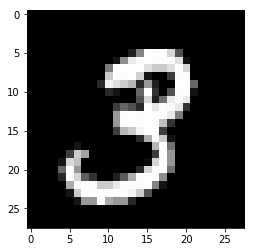

In [58]:
plt.imshow(mnist.train.images[1].reshape(28,28), cmap = 'gist_gray')

In [59]:
# let's now try to plot our test data from mnist dataset

mnist.test.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
mnist.test.images[1].reshape(28,28).shape

(28, 28)

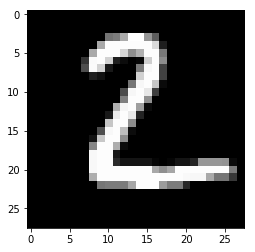

In [61]:
plt.imshow(mnist.test.images[1].reshape(28,28), cmap = 'gist_gray')

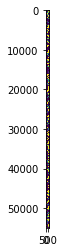

In [62]:
plt.imshow(mnist.train.images)

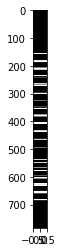

In [63]:
plt.imshow(mnist.train.images[1].reshape(784,1), cmap = 'gist_gray', aspect = 0.02)

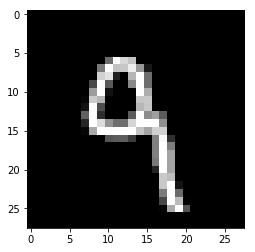

In [64]:
# you can try out number of different values for images index and can visuzlize the different images in out mnist dataset

plt.imshow(mnist.train.images[24].reshape(28,28), cmap = 'gist_gray')

In [72]:
# notice how the dimensions of x --> columns and wieights--> rows match with each other and similarly 
# weight --> columns and bias --> rows match with each other

x = tf.placeholder(tf.float32, shape= [None,784])  # --> training set

w = tf.Variable(tf.zeros([784,10])) # --> weights; we need to multiply our training set with

b = tf.Variable(tf.zeros([10])) # --> biasing

In [77]:
# labels that we are going to predict

y = tf.matmul(x,w) + b

In [78]:
# true labels

y_true = tf.placeholder(tf.float32, shape = [None,10])

In [83]:
# for each labels index we have value either '1' or '0'
# that's called one_hot coded values
# the corresponding digit image will have value '1', rest of the values are going to be '0'

mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [86]:
# to define the actual values and predicted values we use something called 'cross entropy'

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits = y))

In [88]:
# now we want to train our neural network with the 'learning_rate = 0.5'

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)

In [89]:
# grab the optimizer and minimize the values of error off of it

train = optimizer.minimize(cross_entropy)

In [90]:
# initializes all the variables we just created

init = tf.global_variables_initializer()

In [94]:
with tf.Session() as sess:
    sess.run(init) # --> initializes the tensorflow objects that we created in our program
    
    for step in range(1000): # --> this does a variety of steps to train our model
        
        batch_x , batch_y = mnist.train.next_batch(100) # --> grabs 1000 numbers and train the batches for every 100 numbers
        
        sess.run(train,feed_dict = {x:batch_x, y_true:batch_y}) # --> runs the model on the basis of trained sets batch_x, batch_y
        
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1)) # --> returns the matches for where the values of predictions and actual values are equal
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32)) # --> returs how accurate our model has predicted
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9194
